In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Generate data

- https://github.com/zer0n/deepframeworks/blob/master/README.md


#### about neural nets 
- http://www.demo.cs.brandeis.edu/pr/DIBA/
- evolutionary http://www.demo.cs.brandeis.edu/


### How to make predictions with a bayesian model 
- https://www.youtube.com/watch?v=N4XpUocvz5E

In [2]:
import generate_data
import matplotlib.pyplot as plt
import numpy as np
import theano 
import theano.tensor as T

X, Y = generate_data.generate_1dlinear_data()

Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
X.shape

(500,)

In [4]:
Y.shape

(500,)

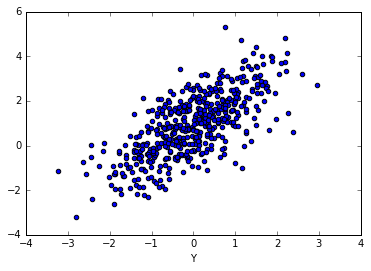

In [5]:
%matplotlib inline

plt.scatter(X, Y)
plt.xlabel("X")
plt.xlabel("Y")

## Learn using a line

In [6]:
import pymc3
from pymc3.distributions import  Normal, HalfNormal
from pymc3 import Model

In [7]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=1)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta*X
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

Applied log-transform to sigma and added transformed sigma_log_ to model.


In [8]:
import pprint

In [9]:
from scipy import optimize

# Point estimate of the parameters
MAP = pymc3.find_MAP(model=basic_model, fmin=optimize.fmin_powell)

pprint.pprint(MAP)

{'alpha': array(0.9598645297781615),
 'beta': array([ 1.00952184]),
 'sigma_log_': array(-0.0016729835529033423)}


In [10]:
def model_prediction(X, alpha, beta):
    return  alpha + beta * X

In [11]:
## plot model
X_grid = np.linspace(-4, 4, 200)

In [12]:
predictions = model_prediction(X_grid, MAP["alpha"],MAP["beta"])

In [13]:
predictions.shape

(200,)

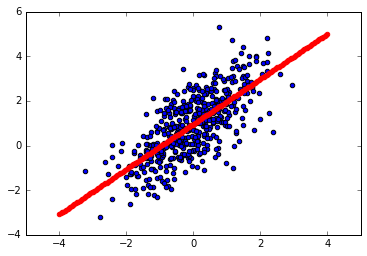

In [14]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

# Write 
plt.scatter(x1_grid,
            predictions,
            color="r")


### 1) Bayesian inference regression line


In [15]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta*X
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

Applied log-transform to sigma and added transformed sigma_log_ to model.


In [16]:
with Model() as model:
      
    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10)
    sigma = HalfNormal('sigma', sd=1)
    
    # Expected value of outcome
    mu = alpha + beta*X

    # Define likelihood
    likelihood = pymc3.Normal('y', 
                              mu= mu,
                              sd=sigma, 
                              observed=Y)
       
    # Inference!
    start = pymc3.find_MAP() # Find starting value by optimization
    step = pymc3.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pymc3.sample(2000, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling

Applied log-transform to sigma and added transformed sigma_log_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 2.4 sec

In [17]:
start

{'alpha': array(0.9598645287172723),
 'beta': array(1.0095219371504889),
 'sigma_log_': array(-0.0016784430569460995)}

In [18]:
print(trace["alpha"].shape)
print(trace["beta"].shape)
print(trace["sigma_log_"].shape)

(2000,)
(2000,)
(2000,)


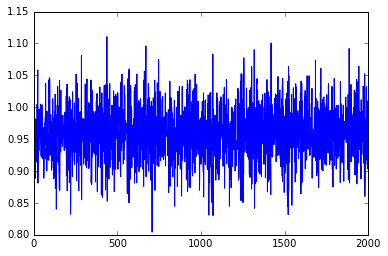

In [19]:
plt.plot(trace["alpha"])

In [20]:
trace["alpha"]

array([ 0.9369336 ,  0.9369336 ,  0.89890178, ...,  0.96044064,
        0.97887521,  0.97887521])

In [21]:
def model_prediction(X, alpha, beta):
    return  alpha + beta * X

In [22]:
## plot model
X_grid = np.linspace(-4, 4, 200)

In [23]:
mean_alpha = trace["alpha"].mean()
mean_beta = trace["beta"].mean()

std_alpha = trace["alpha"].std()
std_beta = trace["beta"].std()


In [24]:
upper_predictions =   model_prediction(X_grid, 
                                     mean_alpha + 3*std_alpha,
                                     mean_beta + 3*std_beta )

In [25]:
lower_predictions = model_prediction(X_grid, 
                                     mean_alpha - 3*std_alpha,
                                     mean_beta - 3*std_beta )

In [26]:
predictions[0:10]

array([-3.07822282, -3.03763902, -2.99705523, -2.95647144, -2.91588765,
       -2.87530385, -2.83472006, -2.79413627, -2.75355248, -2.71296868])

In [27]:
predictions_trace = model_prediction(X_grid, 
                                     mean_alpha, 
                                     mean_beta)

In [28]:
predictions_MAP = model_prediction(X_grid, 
                                   start["alpha"],
                                   start["beta"])

In [29]:
np.linalg.norm( predictions_MAP - predictions_trace)

0.032690559004380428

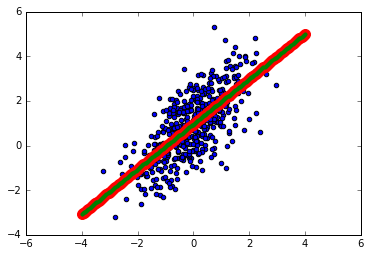

In [30]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

# Write 
plt.scatter(x1_grid,
            predictions_trace  ,
            color="r", 
            s=100)

plt.scatter(x1_grid,
            predictions_MAP  ,
            color="g",
            s=10)

### 2) Plot the results of the bayesian inference

In [31]:
trace["sigma"]

array([ 0.9578573 ,  0.9578573 ,  0.95639169, ...,  0.98936658,
        0.99507962,  0.99507962])

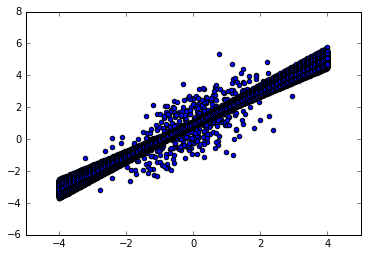

In [32]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

num_models = len(trace)
for i in range(num_models):
    prediction = model_prediction(x1_grid, 
                                  trace["alpha"][i],
                                  trace["beta"][i])
    
    plt.scatter(x1_grid, prediction)

## Learning the same data using a MLP
### variational.advi

In [132]:
X, Y = generate_data.generate_1dlinear_data()

In [139]:
X_train = X.reshape( (len(X),1))
Y_train = Y

print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)

('X_train shape', (500, 1))
('Y_train shape', (500,))


In [140]:
import theano
import theano.tensor as T
import pymc3
import pymc3 as pm


std_val = 0.5
n_hidden = 5
input_dim = 1
output_dim = 1

ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)

# Initialize random weights between each layer
init_w1 = np.random.randn(input_dim , n_hidden)
init_b1 = np.random.randn(n_hidden)

init_w2 = np.random.randn(n_hidden, )
init_b2 = np.random.randn(output_dim )

mlp = pymc3.Model()

with mlp:
    #######################################
    # Prior distributions over parameters #
    #######################################
    
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_0_1', 0, sd=std_val, 
                             shape=(input_dim , n_hidden), 
                             testval=init_w1)
    
    bias_in_1 =  pm.Normal('b_1', 0, sd=1, 
                           shape= (n_hidden,), 
                           testval=init_b1)
            
    # Weights from 1st to 2nd (output) layer
    weights_1_out = pm.Normal('w_1_2', 0, sd=std_val, 
                              shape=(n_hidden, ), 
                              testval=init_w2)
    
    bias_in_2 =  pm.Normal('b_2', 0, sd=1, 
                           shape= (output_dim,), 
                           testval=init_b2)
    
    sigma = pymc3.HalfCauchy('sigma', beta=10, testval=1.)
    
    ####################
    # Model definition #
    ####################
    
    # Expected value of outcome
    act_1 = T.nnet.relu(T.dot(ann_input, weights_in_1) + bias_in_1)
    act_out = T.dot(act_1, weights_1_out) + bias_in_2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=act_out, observed=ann_output)
    #Y_obs = Normal('Y_obs', mu=act_out, sd=sigma, observed=ann_output)

Applied log-transform to sigma and added transformed sigma_log_ to model.


#### Train mlp using bayesian inference

In [149]:
with mlp:
    # Run ADVI which returns posterior means, standard deviations, and the evidence lower bound (ELBO)
    mu_params, sds_params, elbo = pymc3.variational.advi(n=20000)
    step = pm.NUTS(scaling=mlp.dict_to_array(sds_params))
    #trace = pymc3.sample(2000, step, start=mu, progressbar=True)
    trace = pm.sample(100, step, start=mu_params, progressbar=True)

Iteration 0 [0%]: ELBO = -4343.86
Iteration 2000 [10%]: Average ELBO = -3878.63
Iteration 4000 [20%]: Average ELBO = -2299.25
Iteration 6000 [30%]: Average ELBO = -1583.73
Iteration 8000 [40%]: Average ELBO = -1144.67
Iteration 10000 [50%]: Average ELBO = -932.96
Iteration 12000 [60%]: Average ELBO = -840.11
Iteration 14000 [70%]: Average ELBO = -797.21
Iteration 16000 [80%]: Average ELBO = -771.85
Iteration 18000 [90%]: Average ELBO = -758.28
Finished [100%]: Average ELBO = -753.13
 [-----------------100%-----------------] 100 of 100 complete in 26.4 sec

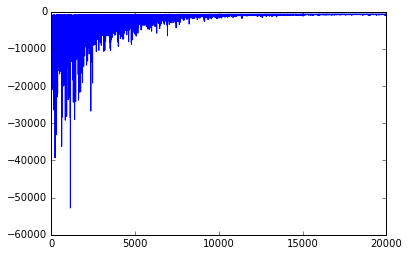

In [150]:
plt.plot(elbo)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee2bb80b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fee1d978e50>]], dtype=object)

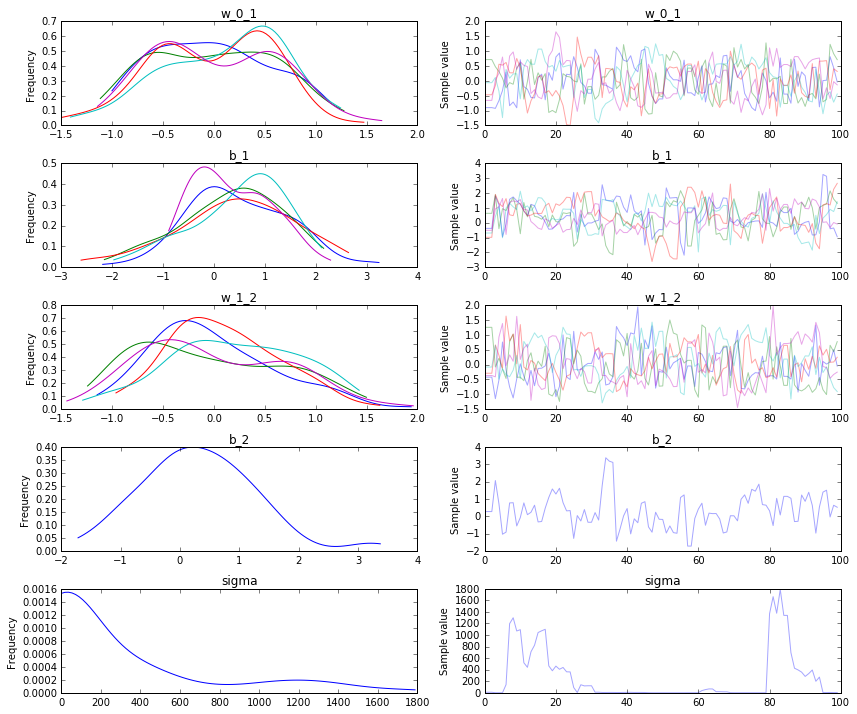

In [151]:
pm.traceplot(trace)

In [152]:
trace["w_0_1"].shape

(100, 1, 5)

In [153]:
trace["w_0_1"].mean(axis=0).shape

(1, 5)

In [154]:
trace["w_0_1"].mean(axis=0)

array([[-0.01604905, -0.00666607, -0.01830515,  0.11003738,  0.02525219]])

In [155]:
###########################
# This should not be done #
###########################

X_train = X.reshape(len(X),1)
Y_train = Y

sym_input = T.dmatrix("sym_input")

# Defined shared variables of the model
sha_W1 = theano.shared(trace["w_0_1"].mean(axis=0))
sha_b1 = theano.shared(trace["b_1"].mean(axis=0))
sha_W2 = theano.shared(trace["w_1_2"].mean(axis=0))
sha_b2 = theano.shared(trace["b_2"].mean(axis=0))

act_1 = T.nnet.relu( T.dot(sym_input, sha_W1) + sha_b1)
act_out = T.dot(act_1, sha_W2) + sha_b2

In [165]:
predict = theano.function([sym_input],act_out)

In [170]:
x1_grid = np.array(x1_grid.reshape(len(x1_grid),1), dtype="float32" )

In [173]:
#predictions = predict(x1_grid)

### Making predictions

In [175]:
x1_grid = np.linspace(-4, 4, 200)

In [178]:
x1_grid = np.array(x1_grid.reshape(len(x1_grid),1), dtype="float32")

In [182]:
dummy_out = np.ones(x1_grid.shape[1], dtype=np.int8)

ann_input.set_value(x1_grid)
ann_output.set_value(dummy_out)

ppc = pm.sample_ppc(trace,
                    model=mlp, 
                    samples=2000)

In [184]:
predictions = ppc['Y_obs'].mean(axis=0)

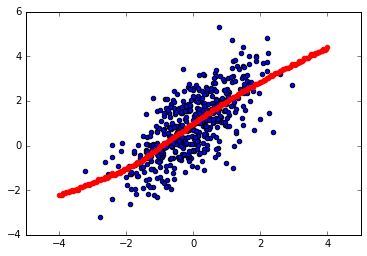

In [191]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# Write 
plt.scatter(x1_grid,
            predictions,
            color="r")

#### Plotting all models

In [ ]:
model_prediction(batch)

    sym_input = T.matrix("sym_input")
    # Expected value of outcome
    act_1 = T.nnet.relu(T.dot(sym_input, w1) + b1)
    act_out = T.dot(act_1, w2) + b2
    
    return act_out

In [ ]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

num_models = len(trace)

for i in range(num_models):
    prediction = model_prediction(x1_grid, 
                                  trace["alpha"][i],
                                  trace["beta"][i])
    
    plt.scatter(x1_grid, prediction)

#### Computing the confidence of our predictions

## Learning the same data using a MLP

### Using find_MAP

In [334]:
import theano
import theano.tensor as T
import pymc3
import pymc3 as pm

X_train = X.reshape(len(X),1)
Y_train = Y

ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)

# Initialize random weights between each layer
init_w1 = np.random.randn(input_dim , n_hidden)
init_b1 = np.random.randn(n_hidden)

init_w2 = np.random.randn(n_hidden, output_dim)
init_b2 = np.random.randn(output_dim )

In [335]:
mlp = pymc3.Model()

with mlp:
    #######################################
    # Prior distributions over parameters #
    #######################################
    
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_0_1', 0, sd=std_val, 
                             shape=(input_dim , n_hidden), 
                             testval=init_w1)
    
    bias_in_1 =  pm.Normal('b_1', 0, sd=1, 
                           shape= (n_hidden,), 
                           testval=init_b1)
            
    # Weights from 1st to 2nd (output) layer
    weights_1_out = pm.Normal('w_1_2', 0, sd=std_val, 
                              shape=(n_hidden,1 ), 
                              testval=init_w2)
    
    bias_in_2 =  pm.Normal('b_2', 0, sd=1, 
                           shape= (output_dim,), 
                           testval=init_b2)
    
    sigma = pymc3.HalfCauchy('sigma', beta=10, testval=1.)
    
    ####################
    # Model definition #
    ####################
    
    # Expected value of outcome
    act_1 = T.nnet.relu(T.dot(ann_input, weights_in_1) + bias_in_1)
    act_out = T.dot(act_1, weights_1_out) + bias_in_2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=act_out, observed=ann_output )
    #Y_obs = Normal('Y_obs', mu=act_out, sd=sigma, observed=ann_output)

Applied log-transform to sigma and added transformed sigma_log_ to model.


In [336]:
with mlp:
    # Inference!
    start = pymc3.find_MAP() # Find starting value by optimization
    step = pymc3.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pymc3.sample(200, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling

 [-----------------100%-----------------] 200 of 200 complete in 253.0 sec

In [337]:
trace

<MultiTrace: 1 chains, 200 iterations, 6 variables>

In [338]:
mu_params

{'b_1': array([-1.03698313, -1.75303267, -1.40772628]),
 'b_2': array([ 0.91755864]),
 'sigma_log_': array(1.8085192723878076),
 'w_0_1': array([[ 0.01439613,  0.00627643,  0.00135914]]),
 'w_1_2': array([[-0.00173971],
        [ 0.00359032],
        [-0.00531535]])}

In [339]:
sds_params

{'b_1': array([ 0.60789399,  0.95192213,  0.74356073]),
 'b_2': array([ 0.16392472]),
 'sigma_log_': 1.6160920845222355,
 'w_0_1': array([[ 0.18706233,  0.17145043,  0.17812802]]),
 'w_1_2': array([[ 0.22876458],
        [ 0.15125377],
        [ 0.20315062]])}

In [340]:
trace["w_1_2"].shape

(200, 3, 1)

#### Looking at the trace 

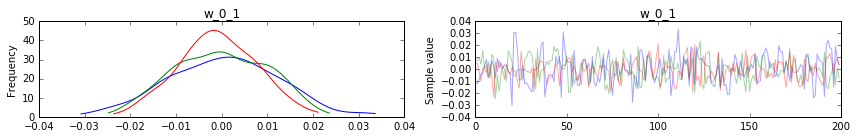

In [341]:
pm.traceplot(trace, ["w_0_1"]);

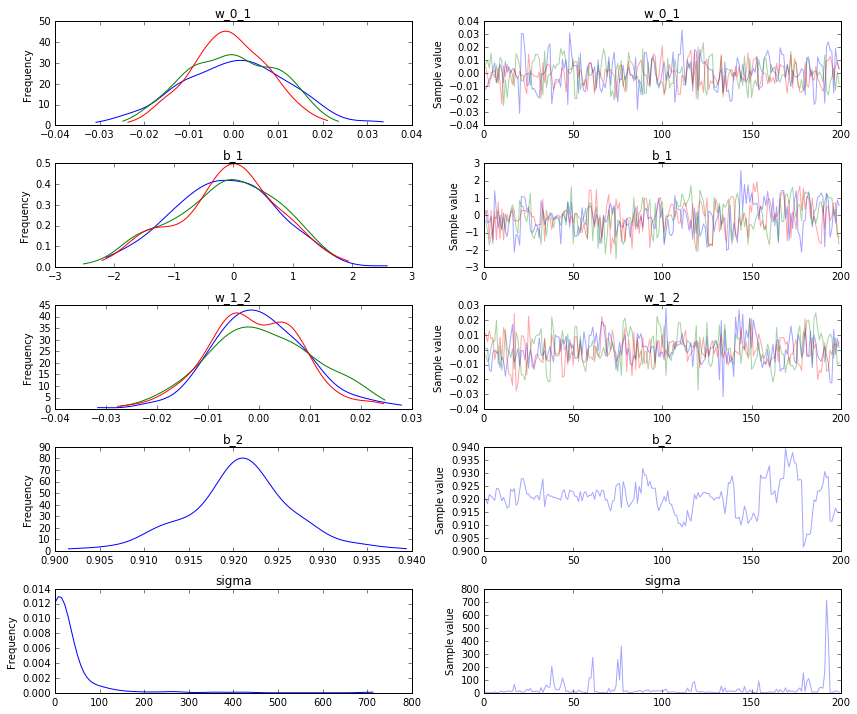

In [342]:
pm.traceplot(trace);

## solution plot

Now lets us:

- Take the learned weights and put them in the MLP object
- Make predictions using the mean value across the samples


In [343]:
trace["w_0_1"].shape

(200, 1, 3)

In [344]:
trace["w_0_1"].mean(axis=0).shape

(1, 3)

In [345]:
trace["w_0_1"].mean(axis=0)

array([[ 0.00045123, -0.00023542, -0.00087786]])

In [346]:
X_train = X.reshape(len(X),1)
Y_train = Y

sym_input = T.dmatrix("sym_input")

# Defined shared variables of the model
sha_W1 = theano.shared(trace["w_0_1"].mean(axis=0))
sha_b1 = theano.shared(trace["b_1"].mean(axis=0))
sha_W2 = theano.shared(trace["w_1_2"].mean(axis=0))
sha_b2 = theano.shared(trace["b_2"].mean(axis=0))

act_1 = T.nnet.relu( T.dot(sym_input, sha_W1) + sha_b1)
act_out = T.dot(act_1, sha_W2) + sha_b2
predict = theano.function([sym_input],act_out)

In [348]:
x1_grid.shape

(200,)

In [349]:
predictions = predict(x1_grid.reshape(len(x1_grid),1))

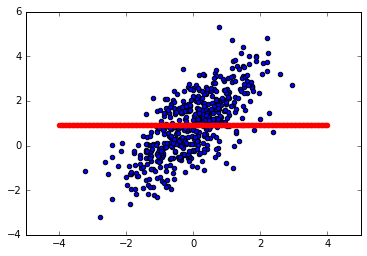

In [350]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# Write 
plt.scatter(x1_grid,
            predictions,
                color="r")

## Sinusoidal data

In [ ]:
X, Y  = generate_1dsinusoidal_data(num_samples=500, seed_val = 123)

## Modelling without mp.sample

In [ ]:
import theano
import theano.tensor as T
import pymc3
import pymc3 as pm
import numpy as np

X_train = np.vstack((X1,X2)).T
Y_train = Y

ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)

In [ ]:
std_val = 0.01
n_hidden = 3
input_dim = 2
output_dim = 1

In [ ]:
# Initialize random weights between each layer
init_w1 = np.random.randn(input_dim , n_hidden)
init_b1 = np.random.randn(n_hidden)

init_w2 = np.random.randn(n_hidden, output_dim)
init_b2 = np.random.randn(output_dim )

In [ ]:
mlp = pymc3.Model()

with mlp:
    #######################################
    # Prior distributions over parameters #
    #######################################
    
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_in_1', 0, sd=std_val, 
                             shape=(input_dim , n_hidden), 
                             testval=init_w1)
    
    bias_in_1 =  pm.Normal('b_in_1', 0, sd=1, 
                           shape= (n_hidden,), 
                           testval=init_b1)
            
    # Weights from 1st to 2nd (output) layer
    weights_1_out = pm.Normal('w_1_2', 0, sd=std_val, 
                              shape=(n_hidden,1 ), 
                              testval=init_w2)
    
    bias_in_2 =  pm.Normal('b_in_2', 0, sd=1, 
                           shape= (output_dim,), 
                           testval=init_b2)
    
    sigma = pymc3.HalfCauchy('sigma', beta=10, testval=1.)
    
    ####################
    # Model definition #
    ####################
    
    # Expected value of outcome
    act_1 = T.nnet.relu(T.dot(ann_input, weights_in_1) + bias_in_1)
    act_out = T.dot(act_1, weights_1_out) + bias_in_2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=act_out, observed=ann_output )
    #Y_obs = Normal('Y_obs', mu=act_out, sd=sigma, observed=ann_output)

In [ ]:
with mlp:
    # Run ADVI which returns posterior means, standard deviations, and the evidence lower bound (ELBO)
    v_params = pm.variational.advi(n=10000)

In [ ]:
plt.plot(v_params.elbo_vals)

In [ ]:
v_params.elbo_vals.max()

In [ ]:
v_params.__dict__

In [ ]:
v_params[0]

In [ ]:
help(pm.variational)

About the evidence lower bounds

- https://benmoran.wordpress.com/2015/02/21/variational-bayes-and-the-evidence-lower-bound/

### Can't we sample? Sure but it's slow...

In [ ]:
with mlp:
    start = pymc3.find_MAP() # Find starting value by optimization
    step = pymc3.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pymc3.sample(100, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling

## Fix parameters of the model and make predictions

### A little theano example

In [ ]:
sym_x = T.dmatrix('x')
s = 1 / (1 + T.exp(-sym_x))
logistic = theano.function([sym_x], s)

In [ ]:
logistic([[0, 1], [-1, -2]])

In [ ]:
sym_input = theano.tensor.matrix("sym_input")

np.random.seed(123)
init_w1 = np.random.randn(input_dim , n_hidden)
init_b1 = np.random.randn(n_hidden)

sha_W1 = theano.shared(init_w1)
sha_b1 = theano.shared(init_b1)

first_layer_act = T.nnet.relu(T.dot(sym_input , sha_W1 ) + sha_b1 )
acti = theano.function([sym_input],first_layer_act)

In [ ]:
acti(np.array([[23],[23]],dtype="float32"))